In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report



In [10]:
# Load dataset
df = pd.read_csv('carbon_neutral_dataset_5sec (1).csv')

# Quick look
print(df.head())
print(df.info())
print(df.describe())

# -----------------------------
# Data Preprocessing
# -----------------------------

# Check and remove null values
print("Null values:\n", df.isnull().sum())
df = df.dropna()

# Encode categorical variables if any
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Normalize numeric features
scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns.drop('Timestamp')  # Replace 'target' with your target column
df[num_cols] = scaler.fit_transform(df[num_cols])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




             Timestamp  Solar Irradiance (W/m²)  Temperature (°C)  \
0  2025-05-13 00:00:00                24.835708         21.325763   
1  2025-05-13 00:00:05                22.766065         21.412681   
2  2025-05-13 00:00:10                20.696423         21.499599   
3  2025-05-13 00:00:15                18.626781         21.586517   
4  2025-05-13 00:00:20                16.557138         21.673435   

   PV Output (kW)  Grid Voltage (V)  Grid Frequency (Hz)  \
0        0.245185        229.023452            50.063993   
1        0.224753        229.210386            50.035211   
2        0.204321        229.397319            50.006429   
3        0.183889        229.584253            49.977648   
4        0.163457        229.771186            49.948866   

   Industrial Load Demand (kW)    SOC (%)  Battery Charge/Discharge (kW)  \
0                    60.229058  49.887899                      -8.696144   
1                    58.024577  49.877562                      -8.721594

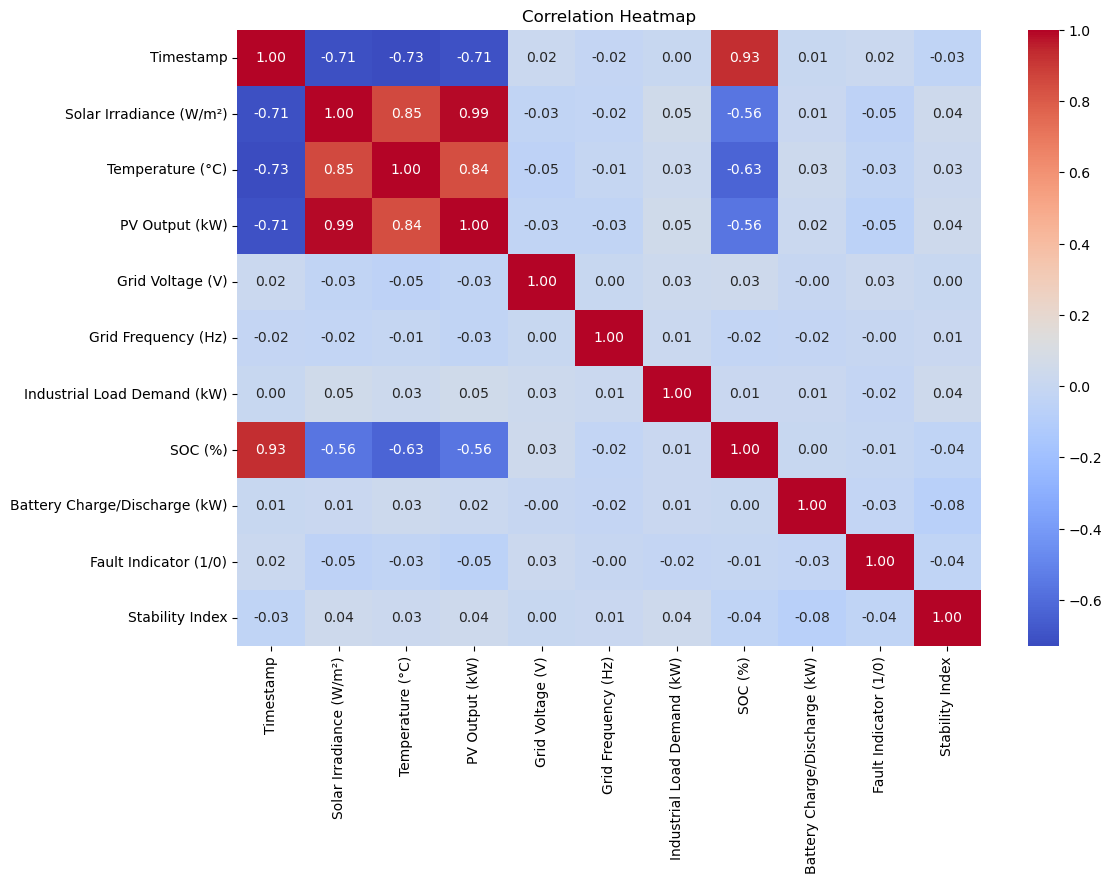

In [13]:
# -----------------------------
# EDA (Exploratory Data Analysis)
# -----------------------------

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



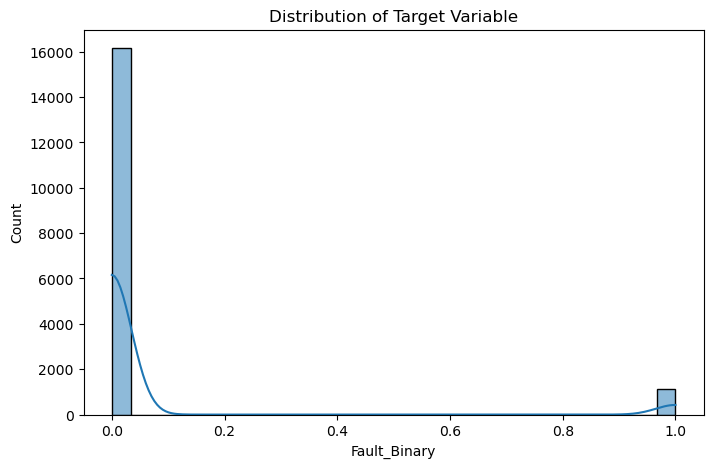

In [12]:
# Histogram of target variable
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.show()



In [14]:
# -----------------------------
# Model Building
# -----------------------------

# Initialize model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# -----------------------------
# Model Evaluation
# -----------------------------

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



Mean Absolute Error (MAE): 0.0896
Root Mean Squared Error (RMSE): 0.1997
R² Score: 0.3367


In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

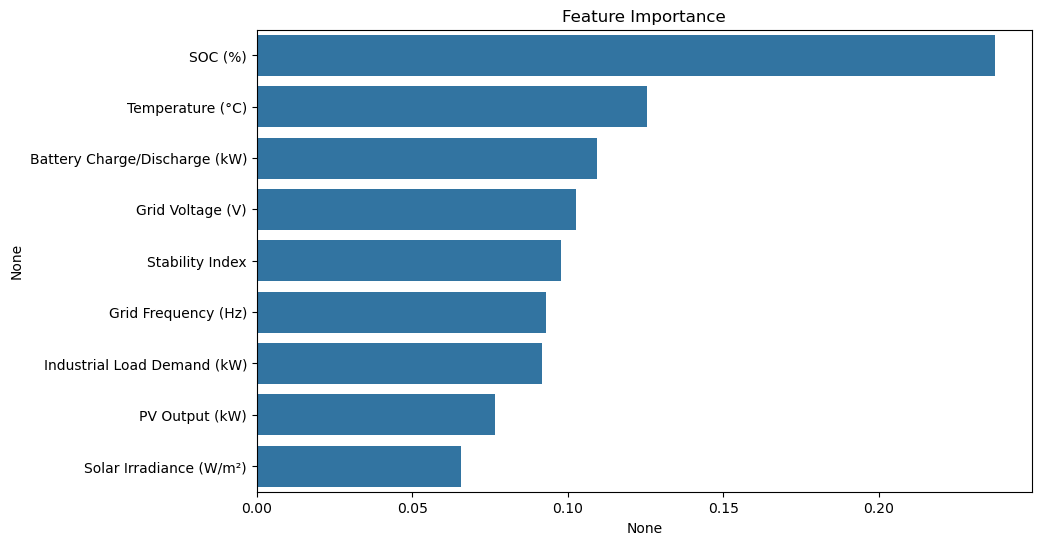

In [16]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance')
plt.show()



In [17]:
# -----------------------------
# Save Results (Optional)
# -----------------------------

# Save predictions to CSV
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('predictions.csv', index=False)

print("Results saved to predictions.csv")

Results saved to predictions.csv


In [18]:


# Load dataset
df = pd.read_csv('carbon_neutral_dataset_5sec (1).csv')



In [19]:
# Check if 'Price' column exists
if 'Stability Index' not in df.columns:
    raise ValueError("The column 'Stability Index' is not found in the dataset. Check the column names.")


In [20]:
# Handling missing values
df.dropna(subset=['Stability Index'], inplace=True)


In [21]:
# Handling missing values
df.dropna(subset=['Stability Index'], inplace=True)


In [22]:
# Convert 'Price' column to numeric if needed
df['Stability Index'] = pd.to_numeric(df['Stability Index'], errors='coerce')


In [23]:
# Drop rows with NaN values after conversion
df.dropna(subset=['Stability Index'], inplace=True)

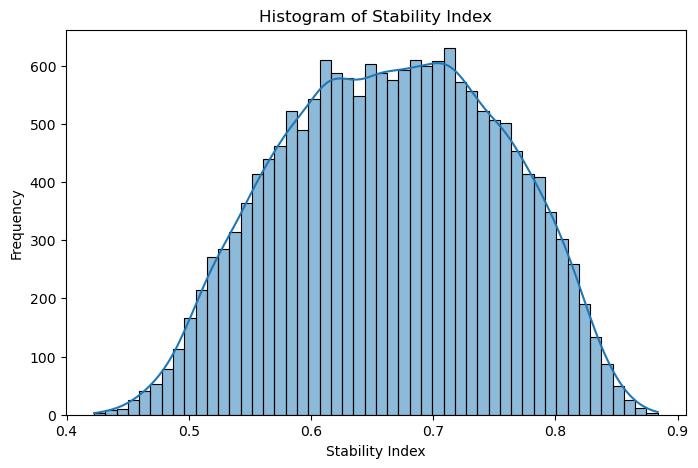

In [24]:


# Check distribution of target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['Stability Index'], bins=50, kde=True)
plt.title("Histogram of Stability Index")
plt.xlabel("Stability Index")
plt.ylabel("Frequency")
plt.show()




In [25]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# Load dataset
df = pd.read_csv('carbon_neutral_dataset_5sec (1).csv')

In [26]:


# Drop Timestamp (or optionally extract datetime features later)
df = df.drop('Timestamp', axis=1)

# Check target values
print("Unique Fault Indicator values:\n", df['Fault Indicator (1/0)'].unique())

# Binarize target: 0 if < 0.5, else 1
df['Fault_Binary'] = (df['Fault Indicator (1/0)'] >= 0.5).astype(int)

# Features and target
X = df.drop(['Fault Indicator (1/0)', 'Fault_Binary'], axis=1)
y = df['Fault_Binary']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)



Unique Fault Indicator values:
 [0.         0.08333333 0.16666667 0.25       0.33333333 0.41666667
 0.5        0.58333333 0.66666667 0.75       0.83333333 0.91666667
 1.         0.91666667 0.83333333 0.66666667 0.58333333 0.41666667
 0.33333333 0.08333333]


In [4]:
# Train model
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=10, random_state=42)

In [5]:
# Predict on test set
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]





In [6]:
# Evaluate model
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"ROC-AUC Score: {roc:.4f}")
print("\nClassification Report:\n", report)

Accuracy: 0.9450
ROC-AUC Score: 0.9438

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3234
           1       1.00      0.14      0.25       222

    accuracy                           0.95      3456
   macro avg       0.97      0.57      0.61      3456
weighted avg       0.95      0.95      0.93      3456



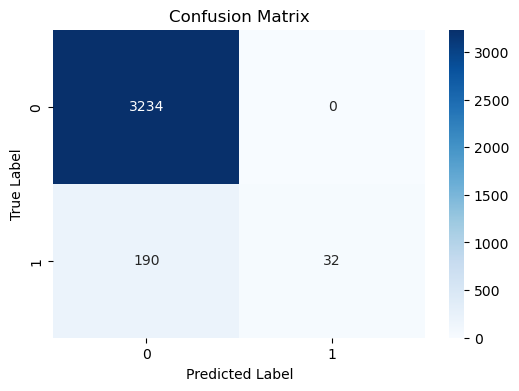

In [7]:
# -----------------------------
# Plot Confusion Matrix
# -----------------------------
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



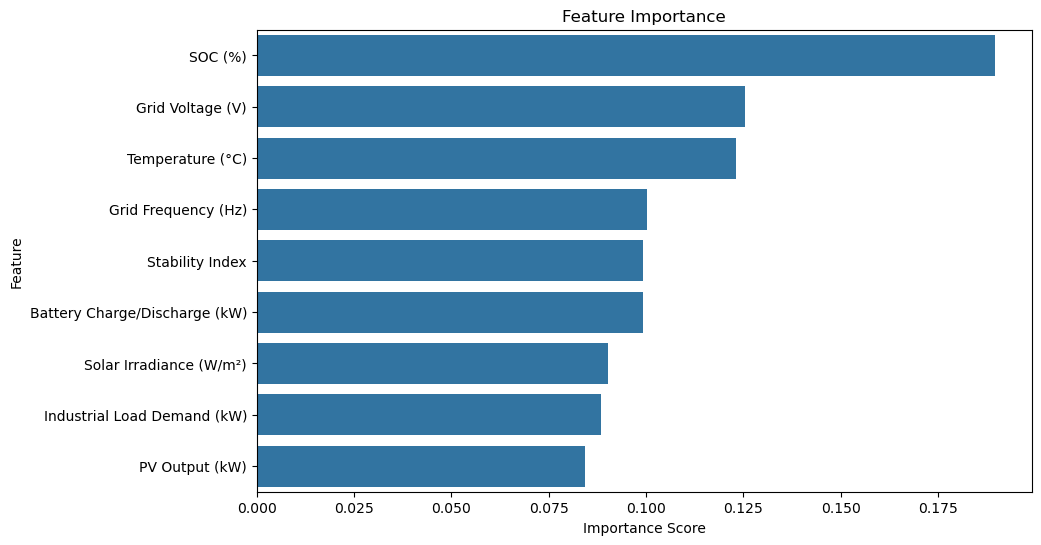

In [8]:
# -----------------------------
# Plot Feature Importance
# -----------------------------
feat_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
